In [1]:
import pandas as pd

In [2]:
smcl_data = pd.read_csv("SMCL_ANF_Items.csv")

C:\Users\onlyd\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
#Renamed the columns for column V, W, X

smcl_data2 = smcl_data.rename(columns={'245|a': 'Book Title','100|a': 'Author',
                                      '008 Date One': 'Published Date'})

#dropped columns

smcl_data_clean = smcl_data2.drop(['LOCATION', 'BARCODE', 'RECORD #(ITEM)',
                 'I TYPE', 'MAT TYPE', 'OTHER CALL', 'MATERIAL'], axis=1)

#created dictionary for the BRANCH column and replaced with actual location

branch_dict = {'0k': 'Bookmobile', '1a':'Atherton', '1b':'Belmont', '1r':'Brisbane','1e':'East Palo Alto','1f':'Foster City'
,'1h':'Half Moon Bay','1m':'Millbrae','1p':'Pacifica Sharp Park','1z':'Pacifica Sanchez','1s':'San Carlos','1v':'Portola Valley','1w':'Woodside'}

#looking for values to combine in Call # field
smcl_data_clean["CALL #"].value_counts()

#cleaning up and only using initial categorey 
smcl_data_clean["CALL #"] = smcl_data_clean["CALL #"].str.split(" ", 1, expand=True)

smcl_data_clean = smcl_data_clean.replace({"BRANCH": branch_dict})

In [4]:
#looking for values to combine in Call # field
smcl_data_clean["CALL #"].value_counts()

#cleaning up and only using initial categorey 
smcl_data_clean["CALL #"] = smcl_data_clean["CALL #"].str.split(" ", 1, expand=True)
smcl_data_clean.head()

,BRANCH,CREATED(ITEM),RECORD #(BIBLIO),CREATED(BIBLIO),YTDCIRC,LYRCIRC,TOT CHKOUT,TOT RENEW,# RENEWALS,STATUS,DUE DATE,LOUTDATE,LCHKIN,CALL #,Book Title,Author,Published Date
0,Portola Valley,7/18/2005 8:45,b10000203,7/18/2005 8:45,0,0,15,6,0,m,- -,4/28/2016 15:35,5/24/2016 11:00,NATURE,Encyclopedia of mammals /,NaN,1998
1,Pacifica Sanchez,7/18/2005 8:45,b10000276,7/18/2005 8:45,0,0,30,11,0,-,- -,4/18/2018 17:17,5/14/2018 10:40,NATURE,Encyclopedia of fishes /,NaN,1998
2,Foster City,7/18/2005 8:45,b1000032x,7/18/2005 8:45,2,3,40,23,0,-,- -,11/24/2019 16:41,1/10/2020 10:47,NATURE,Encyclopedia of birds /,NaN,1998
3,Millbrae,7/18/2005 8:45,b1000032x,7/18/2005 8:45,0,0,17,9,0,-,- -,7/12/2018 15:36,7/14/2018 11:13,NATURE,Encyclopedia of birds /,NaN,1998
4,East Palo Alto,7/18/2005 8:47,b10002364,7/18/2005 8:47,0,0,8,8,0,m,- -,6/8/2016 16:57,8/17/2016 17:01,COOKING,Caribbean and African cooking /,"Grant, Rosamund.",1998


In [5]:

#Removing items starting with "F-"
smcl_data_removed1 = smcl_data_clean[~smcl_data_clean["CALL #"].astype(str).str.startswith('F-')]
#Removing items starting with "M-"
smcl_data_removed2 = smcl_data_removed1[~smcl_data_removed1["CALL #"].astype(str).str.startswith('M-')]
#Removing items starting with "SF-"
smcl_data_removed3 = smcl_data_removed2[~smcl_data_removed2["CALL #"].astype(str).str.startswith('SF-')]
#Removing items starting with "YA-"
smcl_data_removed4 = smcl_data_removed3[~smcl_data_removed3["CALL #"].astype(str).str.startswith('YA-')]

#Removing items that appear less than 10 times
smcl_data_removed5 = smcl_data_removed4.groupby('CALL #').filter(lambda d: len(d) > 10)

#Removing items that are incorrectly placed into ANF
smcl_data_removed6 = smcl_data_removed5[smcl_data_removed5["CALL #"] != "USB"]
smcl_data_removed7 = smcl_data_removed6[smcl_data_removed6["CALL #"] != "SP"]
smcl_data_removed8 = smcl_data_removed7[smcl_data_removed7["CALL #"] != "CHI"]
smcl_data_removed9 = smcl_data_removed8[smcl_data_removed8["CALL #"] != "J"]
smcl_data_removed10 = smcl_data_removed9[smcl_data_removed9["CALL #"] != "DVD"]
smcl_data_removed11 = smcl_data_removed10[smcl_data_removed10["CALL #"] != "CD"]

In [6]:
#Combining Call # that are the same
smcl_data_removed_final = smcl_data_removed11.replace({
                                                        "SOC": "SOC SCI",
                                                        "PERS": "PERS FIN", "PER": "PERS FIN",
                                                        "SPORTS": "SPORT",
                                                        "LANG": "LANG INST",
                                                        "CRAFTS": "CRAFT",
                                                        "PETS": "PET",
                                                        "SELF": "SELFHELP",
                                                        "LITERATUR": "LIT",
                                                        "PHILOSOPH": "PHILSOPH",
                                                        })

smcl_data_removed_final.head()

,BRANCH,CREATED(ITEM),RECORD #(BIBLIO),CREATED(BIBLIO),YTDCIRC,LYRCIRC,TOT CHKOUT,TOT RENEW,# RENEWALS,STATUS,DUE DATE,LOUTDATE,LCHKIN,CALL #,Book Title,Author,Published Date
0,Portola Valley,7/18/2005 8:45,b10000203,7/18/2005 8:45,0,0,15,6,0,m,- -,4/28/2016 15:35,5/24/2016 11:00,NATURE,Encyclopedia of mammals /,NaN,1998
1,Pacifica Sanchez,7/18/2005 8:45,b10000276,7/18/2005 8:45,0,0,30,11,0,-,- -,4/18/2018 17:17,5/14/2018 10:40,NATURE,Encyclopedia of fishes /,NaN,1998
2,Foster City,7/18/2005 8:45,b1000032x,7/18/2005 8:45,2,3,40,23,0,-,- -,11/24/2019 16:41,1/10/2020 10:47,NATURE,Encyclopedia of birds /,NaN,1998
3,Millbrae,7/18/2005 8:45,b1000032x,7/18/2005 8:45,0,0,17,9,0,-,- -,7/12/2018 15:36,7/14/2018 11:13,NATURE,Encyclopedia of birds /,NaN,1998
4,East Palo Alto,7/18/2005 8:47,b10002364,7/18/2005 8:47,0,0,8,8,0,m,- -,6/8/2016 16:57,8/17/2016 17:01,COOKING,Caribbean and African cooking /,"Grant, Rosamund.",1998


In [7]:
smcl_data_removed_final['Total_cir'] = smcl_data_removed_final['TOT CHKOUT'] + smcl_data_removed_final['TOT RENEW']
smcl_data_removed_final.head()

,BRANCH,CREATED(ITEM),RECORD #(BIBLIO),CREATED(BIBLIO),YTDCIRC,LYRCIRC,TOT CHKOUT,TOT RENEW,# RENEWALS,STATUS,DUE DATE,LOUTDATE,LCHKIN,CALL #,Book Title,Author,Published Date,Total_cir
0,Portola Valley,7/18/2005 8:45,b10000203,7/18/2005 8:45,0,0,15,6,0,m,- -,4/28/2016 15:35,5/24/2016 11:00,NATURE,Encyclopedia of mammals /,NaN,1998,21
1,Pacifica Sanchez,7/18/2005 8:45,b10000276,7/18/2005 8:45,0,0,30,11,0,-,- -,4/18/2018 17:17,5/14/2018 10:40,NATURE,Encyclopedia of fishes /,NaN,1998,41
2,Foster City,7/18/2005 8:45,b1000032x,7/18/2005 8:45,2,3,40,23,0,-,- -,11/24/2019 16:41,1/10/2020 10:47,NATURE,Encyclopedia of birds /,NaN,1998,63
3,Millbrae,7/18/2005 8:45,b1000032x,7/18/2005 8:45,0,0,17,9,0,-,- -,7/12/2018 15:36,7/14/2018 11:13,NATURE,Encyclopedia of birds /,NaN,1998,26
4,East Palo Alto,7/18/2005 8:47,b10002364,7/18/2005 8:47,0,0,8,8,0,m,- -,6/8/2016 16:57,8/17/2016 17:01,COOKING,Caribbean and African cooking /,"Grant, Rosamund.",1998,16


In [8]:
smcl_data_removed_final_groupby = smcl_data_removed_final.groupby(['BRANCH', 'CALL #'])
smcl_grouped = smcl_data_removed_final_groupby.sum()

In [9]:
smcl_grouped

YTDCIRC  LYRCIRC  TOT CHKOUT  TOT RENEW  # RENEWALS  \
BRANCH   CALL #                                                          
Atherton ART             6        9          58         71           1   
         BIO           246      537        2498       1659         139   
         BUSINESS       65      132         835       1144          46   
         COLLECT         2        0           8         15           3   
         COMPUTE        23       51         232        560          30   
...                    ...      ...         ...        ...         ...   
Woodside SPORT          20       41         475        427           7   
         TECH            1        3          22         32           5   
         TRANSPRT        0        2          32         31           0   
         TRAVEL        219      333        2041       1983          37   
         TRIBE           1        2          75         45           0   

                   Total_cir  
BRANCH   CALL #               
Atherton ART             129  
         BIO            4157  
         BUSINESS       1979  
         COLLECT          23  
         COMPUTE         792  
...                      ...  
Woodside SPORT           902  
         TECH             54  
         TRANSPRT         63  
         TRAVEL         4024  
         TRIBE           120  

[470 rows x 6 columns]

In [10]:
smcl_grouped_new = smcl_grouped.drop(['YTDCIRC', 'YTDCIRC', 'TOT CHKOUT', 'TOT RENEW', '# RENEWALS', 'LYRCIRC'], axis=1)
#.sort_values(by='Total_cir', ascending=False)

In [11]:
smcl_grouped_new

Total_cir
BRANCH   CALL #             
Atherton ART             129
         BIO            4157
         BUSINESS       1979
         COLLECT          23
         COMPUTE         792
...                      ...
Woodside SPORT           902
         TECH             54
         TRANSPRT         63
         TRAVEL         4024
         TRIBE           120

[470 rows x 1 columns]

In [12]:
print(smcl_grouped_new.to_string())

                               Total_cir
BRANCH              CALL #              
Atherton            ART              129
                    BIO             4157
                    BUSINESS        1979
                    COLLECT           23
                    COMPUTE          792
                    COOKING         3540
                    CRAFT           1170
                    EDUCATE         1108
                    GAME             118
                    GARDEN          1817
                    HEALTH          3124
                    HISTORY         2039
                    HOLIDAY           23
                    HOME            1923
                    LANG INST         84
                    LAW              419
                    LIFE            1074
                    LIT              573
                    MYTH/FLK          43
                    NATURE           298
                    PARTY             22
                    PERS FIN        1011
                

In [13]:
 a=  smcl_data_removed_final.groupby(['BRANCH']).sum()

In [14]:

b = a.drop(['YTDCIRC', 'YTDCIRC', 'TOT CHKOUT', 'TOT RENEW', '# RENEWALS', 'LYRCIRC'], axis=1)


In [15]:
b

,Total_cir
BRANCH,
Atherton,36770
Belmont,348896
Bookmobile,501
Brisbane,35218
East Palo Alto,24603
Foster City,482474
Half Moon Bay,96988
Millbrae,280109
Pacifica Sanchez,101185


In [16]:
c = b.plot.bar(use_index = True ,y='Total_cir')

In [17]:
url = 'https://datahub.smcgov.org/resource/pkmq-j36i.json'
import requests
import json
from pandas.io.json import json_normalize

In [18]:
response = requests.get(url).json()
print(json.dumps(response, indent = 4, sort_keys = False))

[
    {
        "city": "San Mateo County",
        "total_population": "739837",
        "median_age": "39",
        "_0_9_years": "13",
        "_10_19_years": "11",
        "_20_29_years": "12",
        "_30_39_years": "15",
        "_40_49_years": "15",
        "_50_59_years": "14",
        "_60_69_years": "10",
        "_7_79_years": "6",
        "_80_years": "4",
        "american_indian_alaska_native": "0.10",
        "asian": "26",
        "black": "2",
        "latino": "25",
        "pacific_islander": "1",
        "white": "41",
        "speaks_english_less_than_very_well": "19"
    },
    {
        "city": "Atherton ",
        "total_population": "7034",
        "median_age": "49",
        "_0_9_years": "10",
        "_10_19_years": "17",
        "_20_29_years": "7",
        "_30_39_years": "7",
        "_40_49_years": "11",
        "_50_59_years": "16",
        "_60_69_years": "16",
        "_7_79_years": "10",
        "_80_years": "7",
        "american_indian_alaska_nati

In [19]:
cencus_data = json_normalize(response)
cencus_data.head()

,city,total_population,median_age,_0_9_years,_10_19_years,_20_29_years,_30_39_years,_40_49_years,_50_59_years,_60_69_years,_7_79_years,_80_years,american_indian_alaska_native,asian,black,latino,pacific_islander,white,speaks_english_less_than_very_well
0,San Mateo County,739837,39,13,11,12,15,15,14,10,6,4,0.10,26,2,25,1,41,19
1,Atherton,7034,49,10,17,7,7,11,16,16,10,7,0.00,12,0,5,0,79,4
2,Belmont,26503,40,13,11,10,16,15,15,11,6,5,0.20,23,2,13,0,56,10
3,Brisbane,4421,44,11,8,7,18,15,19,12,5,4,0.40,32,2,21,0,42,10
4,Burlingame,29618,40,15,10,10,15,19,13,9,5,4,0.20,21,1,13,0,59,12


In [20]:
pop_data = cencus_data[['city', 'total_population']]
pop_data['city'] = pop_data['city'].str.strip()
pop_data

C:\Users\onlyd\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,city,total_population
0,San Mateo County,739837
1,Atherton,7034
2,Belmont,26503
3,Brisbane,4421
4,Burlingame,29618
5,Colma,1837
6,Daly City,103897
7,East Palo Alto,28920
8,Foster City,31809
9,Half Moon Bay,11803


In [21]:
cir_data = b.reset_index(drop = False)
cir_data = cir_data.rename(columns = {"BRANCH" : "city"})
pacifica = pd.DataFrame({'city' : 'Pacifica', 'Total_cir' : [cir_data.loc[8, 'Total_cir'] + cir_data.loc[9, 'Total_cir']]})
cir_data = cir_data.append(pacifica).reset_index(drop = True)
cir_data = cir_data.drop([8, 9, 2]).reset_index(drop = True)
cir_data

,city,Total_cir
0,Atherton,36770
1,Belmont,348896
2,Brisbane,35218
3,East Palo Alto,24603
4,Foster City,482474
5,Half Moon Bay,96988
6,Millbrae,280109
7,Portola Valley,58297
8,San Carlos,195435
9,Woodside,62080


In [22]:
pop_cir_data = pd.merge(pop_data, cir_data, how = 'right', on = 'city')
pop_cir_data = pop_cir_data.set_index('city')
pop_cir_data

,total_population,Total_cir
city,,
Atherton,7034,36770
Belmont,26503,348896
Brisbane,4421,35218
East Palo Alto,28920,24603
Foster City,31809,482474
Half Moon Bay,11803,96988
Millbrae,22177,280109
Pacifica,38283,212045
Portola Valley,4478,58297


In [23]:
pop_cir_data['Total_cir'] = pop_cir_data.Total_cir.astype(float)
#pop_cir_data['Total_cir'] = pop_cir_data['Total_cir'].sort_values(ascending=True)
pop_cir_data['total_population'] = pop_cir_data.total_population.astype(float)


In [24]:
pop_cir_data['total_population'].sort_values()

city
Brisbane           4421.0
Portola Valley     4478.0
Woodside           5427.0
Atherton           7034.0
Half Moon Bay     11803.0
Millbrae          22177.0
Belmont           26503.0
East Palo Alto    28920.0
San Carlos        29166.0
Foster City       31809.0
Pacifica          38283.0
Name: total_population, dtype: float64

Text(0.5, 0, 'City Population')

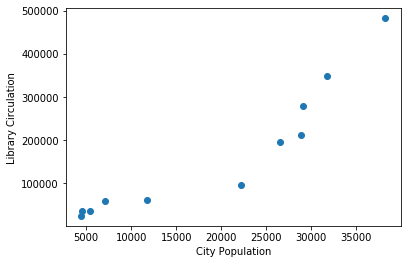

In [25]:
import matplotlib.pyplot as plt
plt.figsize=(20,10)
plt.scatter(pop_cir_data['total_population'].sort_values(), pop_cir_data['Total_cir'].sort_values())
plt.ylabel('Library Circulation')
plt.xlabel('City Population')

The r-squared is: 0.9255872617491917


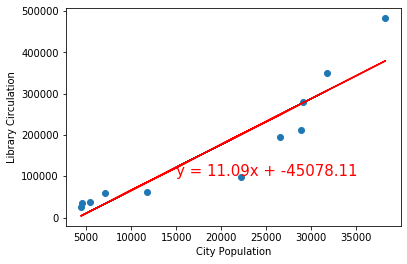

In [26]:
from scipy.stats import linregress

# Add the linear regression equation and line to plot

(slope, intercept, rvalue, pvalue, stderr) = linregress(pop_cir_data['total_population'].sort_values(), pop_cir_data['Total_cir'].sort_values())
regress_values = pop_cir_data['total_population'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(pop_cir_data['total_population'].sort_values(), pop_cir_data['Total_cir'].sort_values())
plt.plot(pop_cir_data['total_population'],regress_values,"r-")
plt.annotate(line_eq,(15000,100000),fontsize=15,color="red")
plt.ylabel('Library Circulation')
plt.xlabel('City Population')

# Print out the r-squared value along with the plot.

print(f"The r-squared is: {rvalue}")
plt.show()

In [27]:
#import scipy.stats as stats
#stats.ttest_ind(pop_cir_data['total_population'], pop_cir_data['Total_cir'], equal_var=False)

In [28]:
demo_data = cencus_data[['city', 'american_indian_alaska_native', 'asian', 'black', 'latino', 'pacific_islander', 'white']]
demo_data['city'] = pop_data['city'].str.strip()
demo_data

C:\Users\onlyd\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,city,american_indian_alaska_native,asian,black,latino,pacific_islander,white
0,San Mateo County,0.10,26,2,25,1,41
1,Atherton,0.00,12,0,5,0,79
2,Belmont,0.20,23,2,13,0,56
3,Brisbane,0.40,32,2,21,0,42
4,Burlingame,0.20,21,1,13,0,59
5,Colma,0.00,32,2,52,0,9
6,Daly City,0.20,57,3,23,0,13
7,East Palo Alto,0.00,3,14,62,12,7
8,Foster City,0.10,46,2,6,0,42
9,Half Moon Bay,0.00,5,2,31,0,61


In [29]:
demo_cir_data = pd.merge(demo_data, cir_data, how = 'right', on = 'city')
demo_cir_data = demo_cir_data.set_index('city')
demo_cir_data

,american_indian_alaska_native,asian,black,latino,pacific_islander,white,Total_cir
city,,,,,,,
Atherton,0.00,12,0,5,0,79,36770
Belmont,0.20,23,2,13,0,56,348896
Brisbane,0.40,32,2,21,0,42,35218
East Palo Alto,0.00,3,14,62,12,7,24603
Foster City,0.10,46,2,6,0,42,482474
Half Moon Bay,0.00,5,2,31,0,61,96988
Millbrae,0.20,43,1,15,1,38,280109
Pacifica,0.20,19,3,18,1,54,212045
Portola Valley,0.00,8,0,3,0,86,58297


In [30]:
demo_cir_data["asian"] = demo_cir_data.asian.astype(float)
demo_cir_data["white"] = demo_cir_data.white.astype(float)
demo_cir_data["black"] = demo_cir_data.black.astype(float)
demo_cir_data["latino"] = demo_cir_data.latino.astype(float)
demo_cir_data["american_indian_alaska_native"] = demo_cir_data.american_indian_alaska_native.astype(float)

#demo_cir_data['asian'] = demo_cir_data['asian'].sort_values(ascending=True)
#demo_cir_data['asian'].sort_values(ascending=True)


In [31]:
demo_cir_data['asian'].sort_values()

city
East Palo Alto     3.0
Half Moon Bay      5.0
Woodside           5.0
Portola Valley     8.0
Atherton          12.0
San Carlos        12.0
Pacifica          19.0
Belmont           23.0
Brisbane          32.0
Millbrae          43.0
Foster City       46.0
Name: asian, dtype: float64

Text(0.5, 0, '% of Asian Population')

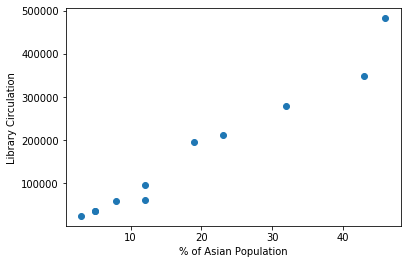

In [32]:
plt.figsize=(20,10)
plt.scatter(demo_cir_data['asian'].sort_values(), pop_cir_data['Total_cir'].sort_values())
plt.ylabel('Library Circulation')
plt.xlabel('% of Asian Population')

In [33]:
age_data = cencus_data[['city', 'median_age', '_0_9_years', '_10_19_years', '_20_29_years', '_30_39_years', '_40_49_years', '_50_59_years', '_60_69_years', '_7_79_years', '_80_years']]
age_data['city'] = pop_data['city'].str.strip()
age_data

C:\Users\onlyd\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,city,median_age,_0_9_years,_10_19_years,_20_29_years,_30_39_years,_40_49_years,_50_59_years,_60_69_years,_7_79_years,_80_years
0,San Mateo County,39,13,11,12,15,15,14,10,6,4
1,Atherton,49,10,17,7,7,11,16,16,10,7
2,Belmont,40,13,11,10,16,15,15,11,6,5
3,Brisbane,44,11,8,7,18,15,19,12,5,4
4,Burlingame,40,15,10,10,15,19,13,9,5,4
5,Colma,30,13,11,25,15,8,15,6,5,1
6,Daly City,38,11,11,16,15,13,14,10,6,4
7,East Palo Alto,29,17,16,20,16,13,10,5,3,1
8,Foster City,41,13,10,9,17,16,13,13,6,4
9,Half Moon Bay,45,10,12,12,11,12,16,15,8,4


In [34]:
age_cir_data = pd.merge(age_data, cir_data, how = 'right', on = 'city')
age_cir_data = age_cir_data.set_index('city')
age_cir_data

,median_age,_0_9_years,_10_19_years,_20_29_years,_30_39_years,_40_49_years,_50_59_years,_60_69_years,_7_79_years,_80_years,Total_cir
city,,,,,,,,,,,
Atherton,49,10,17,7,7,11,16,16,10,7,36770
Belmont,40,13,11,10,16,15,15,11,6,5,348896
Brisbane,44,11,8,7,18,15,19,12,5,4,35218
East Palo Alto,29,17,16,20,16,13,10,5,3,1,24603
Foster City,41,13,10,9,17,16,13,13,6,4,482474
Half Moon Bay,45,10,12,12,11,12,16,15,8,4,96988
Millbrae,45,10,12,11,12,13,17,12,7,7,280109
Pacifica,42,11,12,11,13,17,16,12,5,3,212045
Portola Valley,55,8,12,3,9,10,18,19,11,11,58297


In [35]:
age_cir_data["Total_cir"] = age_cir_data.Total_cir.astype(float)
age_cir_data["median_age"] = age_cir_data.median_age.astype(float)

In [36]:
median_age_cir_data = age_cir_data[['median_age', 'Total_cir']]
median_age_cir_data

,median_age,Total_cir
city,,
Atherton,49.0,36770.0
Belmont,40.0,348896.0
Brisbane,44.0,35218.0
East Palo Alto,29.0,24603.0
Foster City,41.0,482474.0
Half Moon Bay,45.0,96988.0
Millbrae,45.0,280109.0
Pacifica,42.0,212045.0
Portola Valley,55.0,58297.0


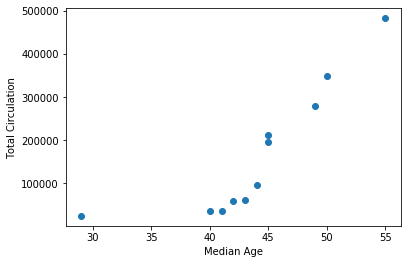

In [37]:
plt.figsize=(20,10)
plt.scatter(age_cir_data['median_age'].sort_values(), pop_cir_data['Total_cir'].sort_values())
plt.ylabel('Total Circulation')
plt.xlabel('Median Age')
plt.show()

The r-squared is: 0.8525388467996478


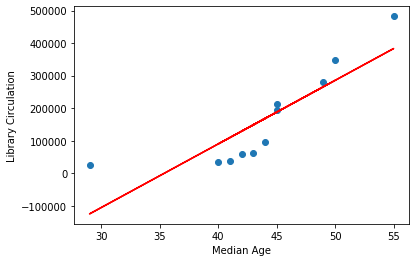

In [38]:
# Add the linear regression equation and line to plot

(slope, intercept, rvalue, pvalue, stderr) = linregress(age_cir_data['median_age'].sort_values(), pop_cir_data['Total_cir'].sort_values())
regress_values_age = age_cir_data['median_age'] * slope + intercept
line_eq_age = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(age_cir_data['median_age'].sort_values(), pop_cir_data['Total_cir'].sort_values())
plt.plot(age_cir_data['median_age'],regress_values_age,"r-")
#plt.annotate(line_eq_age,(35,-100000),fontsize=15,color="red")
plt.ylabel('Library Circulation')
plt.xlabel('Median Age')

# Print out the r-squared value along with the plot.

print(f"The r-squared is: {rvalue}")
plt.show()